In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv("books_additional.csv")

In [3]:
# Number of gender __ authors per semester 
master = books.copy()

master['Male'] = [1 if g == 'male' else 0 for g in books['Gender']]
master['Female'] = [1 if g == 'female' else 0 for g in books['Gender']]

master["Weighted Male"] = master["Male"] * master["Number Students"]
master["Weighted Female"] = master["Female"] * master["Number Students"]


# DROP ROWS IF IS SUMMER, SINCE FEWER BOOKS AND STUDENTS. FEEL FREE TO COMMENT OUT.
master = master[master["Semester"].str.contains("Summer") == False]


master.head()

,Semester,Class,Class Number,Section Number,Title,Author(s),Gender,Number Students,Professor,Male,Female,Weighted Male,Weighted Female
0,Spring 2012,Reading & Composition: American Song,English R1A,1,Souls of Black Folk,['W. E. B. Du Bois'],male,16.0,"Sullivan,Khalil",1,0,16.0,0.0
1,Spring 2012,Reading & Composition: American Song,English R1A,1,The American Songbag,['Carl Sandburg'],male,16.0,"Sullivan,Khalil",1,0,16.0,0.0
2,Spring 2012,Reading & Composition: American Song,English R1A,1,American Ballads and Folk SOngs,['Alan Lomax'],male,16.0,"Sullivan,Khalil",1,0,16.0,0.0
3,Spring 2012,Reading & Composition: Apocalypse / Now,English R1A,2,On the Principle of Population,['Thomas Robert Malthus'],male,18.0,"Cullen,Ben",1,0,18.0,0.0
4,Spring 2012,Reading & Composition: Apocalypse / Now,English R1A,2,The Road,['Cormac McCarthy'],male,18.0,"Cullen,Ben",1,0,18.0,0.0


In [4]:
genders = master.copy()
drop_cols = [c for c in genders.columns if c not in ["Semester", "Male", "Female", "Weighted Male", "Weighted Female"]]
genders.drop(drop_cols, axis=1, inplace=True)

genders = genders.groupby("Semester", sort=False).sum()
genders["Proportion"] = genders["Male"] / (genders["Male"] + genders["Female"])
genders["Weighted Proportion"] = genders["Weighted Male"] / (genders["Weighted Male"] + genders["Weighted Female"])

genders.head()

,Male,Female,Weighted Male,Weighted Female,Proportion,Weighted Proportion
Semester,,,,,,
Spring 2012,265,112,7738.0,3134.0,0.702918,0.711737
Fall 2012,232,90,7909.0,3172.0,0.720497,0.713744
Spring 2013,151,72,4679.0,2297.0,0.677130,0.670728
Fall 2013,235,90,8492.0,3226.0,0.723077,0.724697
Spring 2014,239,98,5298.0,2871.0,0.709199,0.648549


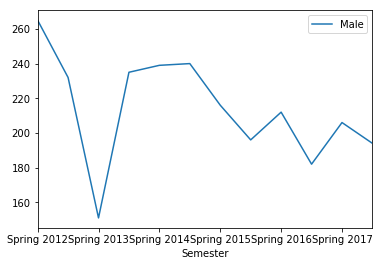

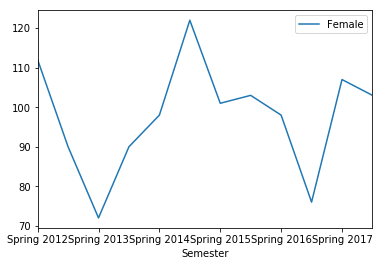

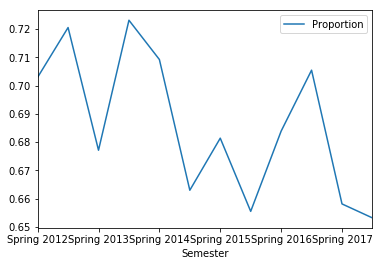

In [5]:
# MALE
male = genders.copy()
drop_list = [c for c in male.columns if c != "Semester" and c != "Male"]
male.drop(drop_list, axis=1, inplace=True)

plt.figure()
male.plot()
plt.show()

# FEMALE
female = genders.copy()
drop_list = [c for c in female.columns if c != "Semester" and c != "Female"]
female.drop(drop_list, axis=1, inplace=True)

plt.figure()
female.plot()
plt.show()

# Proportion
p = genders.copy()
drop_list = [c for c in p.columns if c != "Semester" and c != "Proportion"]
p.drop(drop_list, axis=1, inplace=True)

plt.figure()
p.plot()
plt.show()

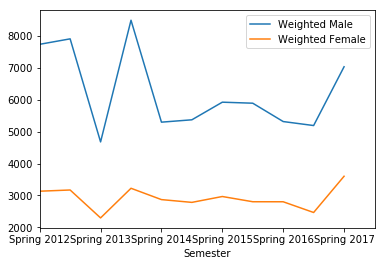

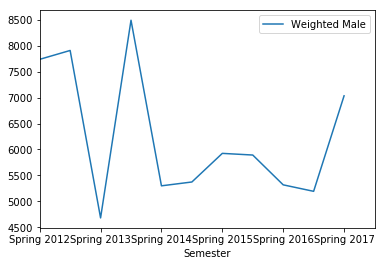

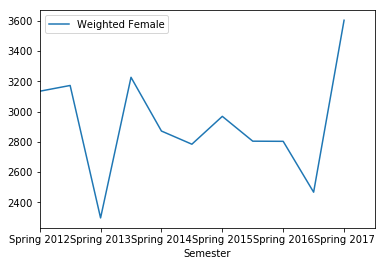

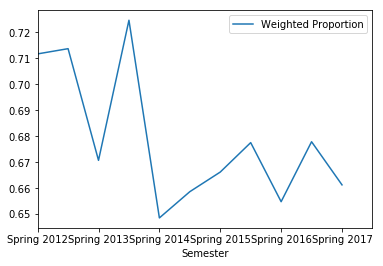

In [6]:
# WEIGHTED MALE AND FEMALE TOGETHER
weighted = genders.copy()
drop_list = [c for c in weighted.columns if c != "Semester" and c != "Weighted Male" and c != "Weighted Female"]
weighted.drop(drop_list, axis=1, inplace=True)

plt.figure()
weighted.plot()
plt.show()

# WEIGHTED MALE ONLY
wmale = genders.copy()
drop_list = [c for c in wmale.columns if c != "Semester" and c != "Weighted Male"]
wmale.drop(drop_list, axis=1, inplace=True)

plt.figure()
wmale.plot()
plt.show()

# WEIGHTED FEMALE ONLY
wfemale = genders.copy()
drop_list = [c for c in wfemale.columns if c != "Semester" and c != "Weighted Female"]
wfemale.drop(drop_list, axis=1, inplace=True)

plt.figure()
wfemale.plot()
plt.show()

# WEIGHTED PROPORTION
wp = genders.copy()
drop_list = [c for c in wp.columns if c != "Semester" and c != "Weighted Proportion"]
wp.drop(drop_list, axis=1, inplace=True)

plt.figure()
wp.plot()
plt.show()

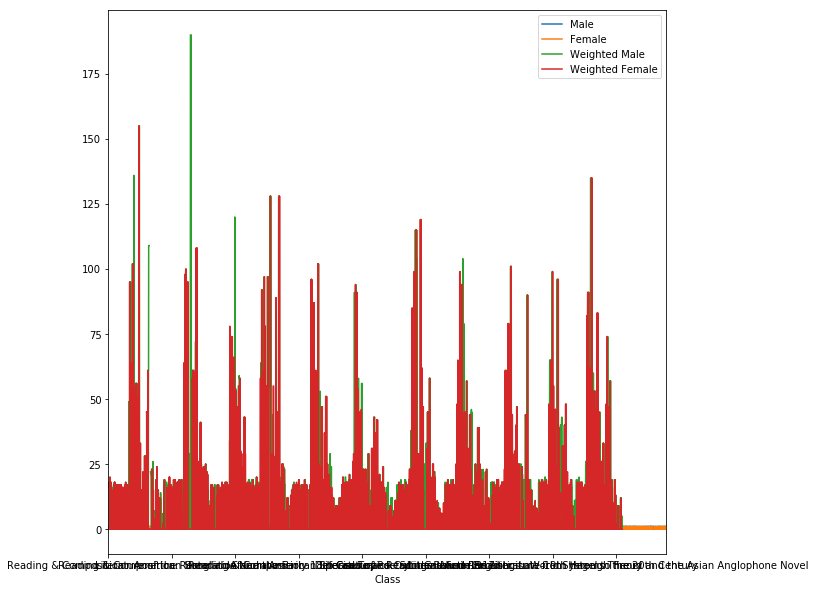

In [7]:
# A BIG ASS CHART.
most_males = master.copy()
drop_cols = [c for c in most_males.columns if c not in ["Semester", "Class", "Class Number", "Male", "Female", "Weighted Male", "Weighted Female"]]
most_males.drop(drop_cols, axis=1, inplace=True)
most_males_grouped = most_males.groupby(["Semester", "Class", "Class Number"], sort=False).sum()
most_males_grouped.head()

plt.figure()
most_males.plot(kind="line", x="Class", figsize=(10,10), rot=0)
plt.show()


In [8]:
prof = master.copy()
drop_cols = [c for c in prof.columns if c not in ["Male", "Female", "Number Students", "Weighted Male", "Weighted Female", "Professor"]]
prof.drop(drop_cols, axis=1, inplace=True)

prof = prof[prof["Professor"] != "Noinstructor"]

prof = prof.groupby("Professor", sort=False).sum()
prof["Weighted Proportion"] = prof["Weighted Male"] / (prof["Weighted Female"] + prof["Weighted Male"])
prof["Proportion"] = prof["Male"] / (prof["Female"] + prof["Male"])
prof.reset_index()
prof.sort_values(["Weighted Proportion", "Weighted Male"], ascending=False, inplace=True)

prof

,Number Students,Male,Female,Weighted Male,Weighted Female,Weighted Proportion,Proportion
Professor,,,,,,,
"Naiman,Eric",337.0,9,0,337.0,0.0,1.000000,1.000000
"O'BrienO'Keeffe,",414.0,9,0,303.0,0.0,1.000000,1.000000
"Moran,Kathleen",201.0,6,0,201.0,0.0,1.000000,1.000000
"Nelson,Alan",288.0,5,0,169.0,0.0,1.000000,1.000000
"Shelley,Jonathan",165.0,9,0,148.0,0.0,1.000000,1.000000
"Kelly,Tyleen",192.0,9,0,143.0,0.0,1.000000,1.000000
"Marno,David",559.0,6,0,138.0,0.0,1.000000,1.000000
"Scott,Mark",156.0,7,0,137.0,0.0,1.000000,1.000000
"Liu,Aileen",148.0,8,0,131.0,0.0,1.000000,1.000000


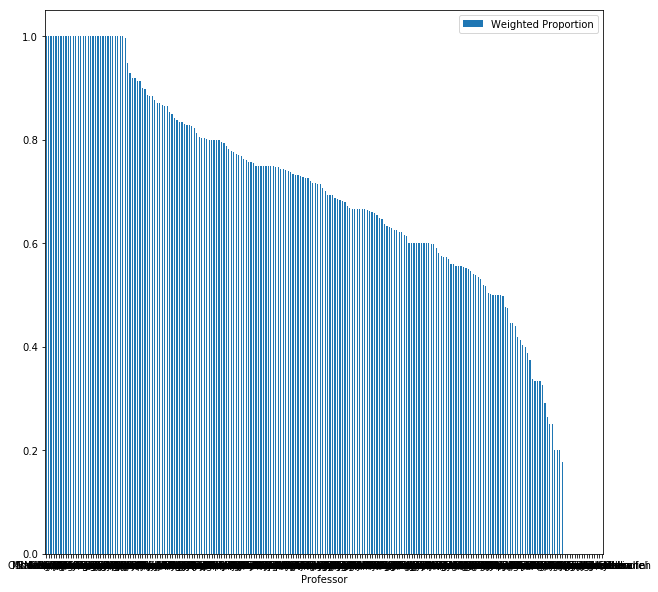

In [9]:
plt.figure()
prof.plot(kind="bar", y="Weighted Proportion", figsize=(10,10), rot=0)
plt.show()

In [ ]:
# QUESTIONS FOR THE FUTURE
# Most women dominanted class per semester?
# Most common authors?
# Lower division vs upper division
# top, bottom for weighted proportions-- professors for those classes
    # Call those professors!
    # Librarian
    # English students- english undergraduate association?
    # English x GWS students?
    # Dean of English @ very end